In [29]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
from PIL import Image

In [ ]:
### Part 1: Create a grid representing world map (style A) with only white/navy squares included ###

In [2]:
# SETUP dimensions
# blocks
rows_blocks = 5
cols_blocks  = 8
squares_per_block = 16
# squares
rows = rows_blocks * squares_per_block # num of rows (squares unit) in world map
cols = cols_blocks * squares_per_block # num of cols (squares unit) in world map
# initialize grid
grid = np.zeros((rows, cols))

# PATHS to blocks and square images
block_paths = glob.glob('blocks/*')
block_paths.sort() # sorts paths from (0,0), (0,1), ... -> ..., (4,6), (4,7) 

square_paths = glob.glob('squares/*')
square_paths.sort() # sorts paths from 1, 2, .. ->  9

In [3]:
# INITIALIZE BASE COLORS
colors = []
# reads each square and pulls the main GBR color
for sq_path in square_paths:
    sq = cv2.imread(sq_path, cv2.IMREAD_COLOR) # reads image of square
    color = sq[14, 6] # gets GBR color of square at coordinate 14, 6
    colors.append(color)
    print(sq_path, " : ", color)

squares/ss_01.png  :  [255 255 255]
squares/ss_02.png  :  [81 47  0]
squares/ss_03.png  :  [204 175  18]
squares/ss_04.png  :  [139 143   0]
squares/ss_05.png  :  [ 48 152   0]
squares/ss_06.png  :  [ 17 189 152]
squares/ss_07.png  :  [133 194 222]
squares/ss_08.png  :  [  0 162 247]
squares/ss_09.png  :  [  0 106 235]
squares/ss_10.png  :  [101  96 234]


In [7]:
# takes in a square image
# returns index of color that best matches in the squares array; based on minimum difference in B G R values
def best_square(img):
    min_diff = np.Inf
    best_index = 0
    sq_color = img[17, 8]
    sq_b, sq_g, sq_r = int(sq_color[0]), int(sq_color[1]), int(sq_color[2])
    # print("square bgr:", color)
        
    # loops through each available color and sees if it matches
    for i in range(len(colors)):
        curr_color = colors[i]
        curr_b, curr_g, curr_r = int(curr_color[0]), int(curr_color[1]), int(curr_color[2])
        diff = abs(sq_b - curr_b) + abs(sq_g - curr_g) + abs(sq_r - curr_r)
        # print("total diff at index {i}:", diff)
        if diff < min_diff:
            min_diff = diff
            best_index = i + 1
    # print(best_index)
    return best_index

In [5]:
# fills the grid with the color numbers for the corresponding block
def fill_grid_with_block(block_row, block_col, block):
    sq_row = 16 * block_row
    sq_col = 16 * block_col
    # avg height / width per square within block
    block_height = block.shape[0] // 16
    block_width = block.shape[1] // 16
    
    # for every square in 16 x 16 block
    for r in range(squares_per_block):
        for c in range(squares_per_block):
            curr_sq = block[block_width * r : block_width * (r + 1), block_height * c : block_height * (c + 1), :]
            best_color = best_square(curr_sq)
            # plt.imshow(curr_sq)
            # plt.title("({}, {}), estimate: {}".format(r, c, best_color))
            # plt.show()
            grid[sq_row + r][sq_col + c] = best_color
    # print(grid)

In [8]:
### For each block path, get the block and fill the grid
for (i, b_path) in enumerate(block_paths):
    block_row = i // 8
    block_col = i % 8
    # gets block
    curr_block = cv2.imread(b_path, cv2.IMREAD_COLOR)

    fill_grid_with_block(block_row, block_col, curr_block)
    # break
    

In [ ]:
### Part 2: Create ways to view the grid, block by block and the whole map ###

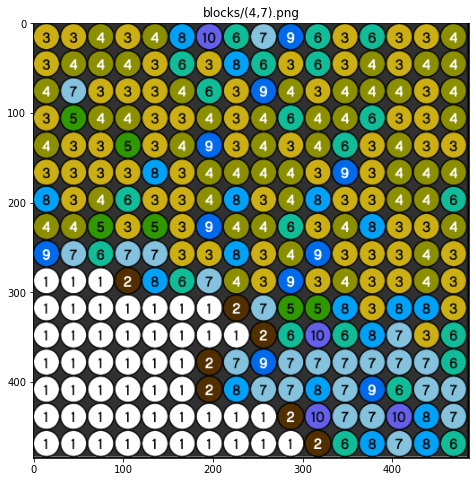

[[ 3.  3.  4.  3.  4.  8. 10.  6.  7.  9.  6.  3.  6.  3.  3.  4.]
 [ 3.  4.  4.  4.  3.  6.  3.  8.  6.  3.  6.  3.  4.  3.  4.  4.]
 [ 4.  7.  3.  3.  3.  4.  6.  3.  9.  4.  3.  4.  4.  4.  3.  4.]
 [ 3.  5.  4.  4.  3.  3.  4.  3.  4.  6.  4.  4.  6.  3.  3.  4.]
 [ 4.  3.  3.  5.  3.  4.  9.  3.  4.  3.  4.  6.  3.  4.  3.  3.]
 [ 3.  3.  3.  3.  8.  3.  4.  4.  4.  4.  3.  9.  3.  4.  4.  4.]
 [ 8.  3.  4.  6.  3.  3.  4.  8.  3.  4.  8.  3.  3.  4.  4.  6.]
 [ 4.  4.  5.  3.  5.  3.  9.  4.  4.  6.  3.  4.  8.  3.  3.  4.]
 [ 9.  7.  6.  7.  7.  3.  3.  8.  3.  4.  9.  3.  3.  3.  4.  3.]
 [ 1.  1.  1.  2.  8.  6.  7.  4.  3.  9.  3.  4.  3.  3.  4.  3.]
 [ 1.  1.  1.  1.  1.  1.  1.  2.  7.  5.  5.  8.  3.  8.  8.  3.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  2.  6. 10.  6.  8.  7.  3.  6.]
 [ 1.  1.  1.  1.  1.  1.  2.  7.  9.  7.  7.  7.  7.  7.  7.  6.]
 [ 1.  1.  1.  1.  1.  1.  2.  8.  7.  7.  8.  7.  9.  6.  7.  7.]
 [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  2. 10.  7.  7. 10.  8. 

In [18]:
def view_block(r, c):
    
    b_path = "blocks/({},{}).png".format(r, c)
    block = cv2.imread(b_path, cv2.IMREAD_COLOR)
    plt.figure(figsize=(8,8))
    plt.imshow(block)
    plt.title(b_path)
    plt.show()
    
    print(grid[(r * 16) : (r * 16) + 16, (c * 16) : (c * 16) + 16])
    return

# view_block(0, 0)
# view_block(3, 1)
view_block(4, 7)

In [19]:
np.save("grid.np", grid)

In [26]:

colored_grid = np.zeros((rows, cols, 3))
for i in range(rows):
    for j in range(cols):
        colored_grid[i, j, :] = colors[int(grid[i][j]) - 1]

In [27]:
cv2.imwrite("colored_grid.jpg", colored_grid)

True

In [35]:
bigger_img = Image.open("colored_grid.jpg")

bigger_img = bigger_img.resize((800, 500), Image.ANTIALIAS)

bigger_img.show()

bigger_img.save("big_colored_grid.jpg", "JPEG")

In [28]:
### Part 3: Style the empty parts of the map with the remaining squares (detailed in map uilding guide) ###
